In [0]:
from IPython.core.interactiveshell import InteractiveShell

# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

Data: The Cambridge-driving Labeled Video Database (CamVid)<br/>
Model: Unet

In [0]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [29]:
path = untar_data(URLs.CAMVID) # The locations where the data and models are downloaded are set in config.yml
path.ls() 

[PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/images'),
 PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/codes.txt')]

In [0]:
path_img = path/'images'
path_lbl = path/'labels'
fnames = get_image_files(path_img) #filename
lbl_names = get_image_files(path_lbl)

Collections

### Default Dict: [Link](https://docs.python.org/3.8/library/collections.html#defaultdict-objects)
- easy to group a sequence of key and value pairs into a dictionary of list?

##1.(Play with data) My Hypothesis
- File name has `A_B` format. and A / B would be at key-value position.
- Use `collections - defaultdict`

In [0]:
from collections import defaultdict

In [32]:
fnames[0], lbl_names[0]

(PosixPath('/root/.fastai/data/camvid/images/0001TP_009210.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_01800_P.png'))

In [0]:
files = [tuple(i.stem.split('_')) for i in fnames]

In [0]:
labels = [tuple(i.stem.split('_')[:-1]) for i in lbl_names]

In [0]:
d = defaultdict(list)
for k, v in files: d[k].append(v)

In [50]:
d.keys()
len(d['0001TP'])

124

In [55]:
for k, v in d.items():
    print(k, v)

0001TP ['009210', '008850', '007350', '008970', '009840', '010140', '008490', '008520', '009540', '008250', '008340', '006840', '007860', '007410', '007740', '009870', '010080', '007890', '008790', '010020', '008400', '007080', '008280', '010380', '009330', '009060', '007470', '006810', '009720', '008580', '007110', '008730', '009150', '007680', '009780', '007800', '007290', '008760', '009510', '008640', '008310', '007440', '006900', '007500', '008460', '009030', '008130', '009480', '009900', '010230', '009270', '008040', '007590', '007950', '009990', '008550', '007260', '008100', '007530', '006960', '008190', '009420', '009930', '009000', '007830', '008940', '006690', '009570', '008880', '010170', '007560', '009300', '006750', '009360', '010200', '007320', '008010', '009120', '007620', '007200', '007140', '010320', '006720', '008670', '007230', '008370', '010260', '009690', '006930', '009090', '007770', '010290', '010350', '008610', '008070', '009600', '008430', '009450', '007380', '0

In [72]:
for k, v in d.items():
    print(k, len(d[k]))

0001TP 124
0016E5 305
Seq05VD 171
0006R0 101


In [70]:
for i in d2.keys():
    print(i,len(d2[i]))

0016E5 305
0001TP 124
0006R0 101
Seq05VD 171


In [0]:
files[0], labels[0]

(('0001TP', '009210'), ('0016E5', '01800'))

##2.My question: [Link](https://docs.fast.ai/vision.image.html#ImageSegment)

* Why do we need masking? and does color from fastai library? (have to look into source code)
* What do the parameter alpha do?
* When people make masked img, would it be have ranged integer limit?
* Does image normalization related with this?

In [0]:
lbl_sorted = sorted(lbl_names)
f_sorted = sorted(fnames)

In [0]:
lbl_1 = lbl_sorted[33]
f_1 = f_sorted[33]

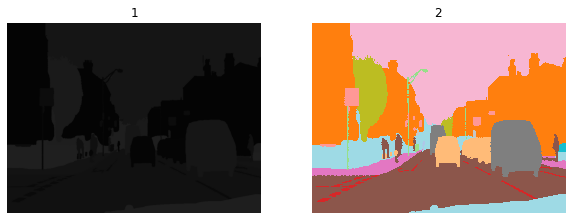

In [84]:
img = open_image(lbl_1)
mask = open_mask(lbl_1)
_,axs = plt.subplots(1,2, figsize=(10,5))
# img.show(ax=axs[0], y=mask, title='masked')
img.show(ax=axs[0], title='1')
mask.show(ax=axs[1], title='2', alpha=1.)

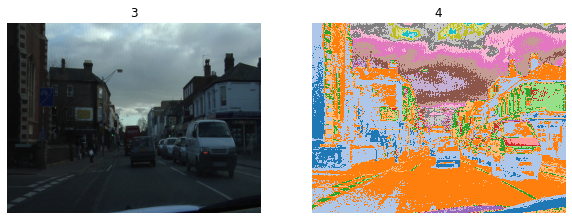

In [94]:
img_2 = open_image(f_1)
mask_2 = open_mask(f_1)
_,axs = plt.subplots(1,2, figsize=(10,5))
# img.show(ax=axs[0], y=mask, title='masked')
img_2.show(ax=axs[0], title='3',)
mask_2.show(ax=axs[1], title='4', alpha=1.)

In [86]:
open_mask(lbl_1).data.shape

torch.Size([1, 720, 960])

In [87]:
open_mask(lbl_1).data.shape

torch.Size([1, 720, 960])

In [88]:
open_image(f_1).data.shape

torch.Size([3, 720, 960])

In [89]:
open_image(f_1).data.shape

torch.Size([3, 720, 960])

In [90]:
img.data #labeled data

tensor([[[0.0157, 0.0157, 0.0157,  ..., 0.0824, 0.0824, 0.0824],
         [0.0157, 0.0157, 0.0157,  ..., 0.0824, 0.0824, 0.0824],
         [0.0157, 0.0157, 0.0157,  ..., 0.0824, 0.0824, 0.0824],
         ...,
         [0.0667, 0.0667, 0.0667,  ..., 0.1176, 0.1176, 0.1176],
         [0.0667, 0.0667, 0.0667,  ..., 0.1176, 0.1176, 0.1176],
         [0.0667, 0.0667, 0.0667,  ..., 0.1176, 0.1176, 0.1176]],

        [[0.0157, 0.0157, 0.0157,  ..., 0.0824, 0.0824, 0.0824],
         [0.0157, 0.0157, 0.0157,  ..., 0.0824, 0.0824, 0.0824],
         [0.0157, 0.0157, 0.0157,  ..., 0.0824, 0.0824, 0.0824],
         ...,
         [0.0667, 0.0667, 0.0667,  ..., 0.1176, 0.1176, 0.1176],
         [0.0667, 0.0667, 0.0667,  ..., 0.1176, 0.1176, 0.1176],
         [0.0667, 0.0667, 0.0667,  ..., 0.1176, 0.1176, 0.1176]],

        [[0.0157, 0.0157, 0.0157,  ..., 0.0824, 0.0824, 0.0824],
         [0.0157, 0.0157, 0.0157,  ..., 0.0824, 0.0824, 0.0824],
         [0.0157, 0.0157, 0.0157,  ..., 0.0824, 0.0824, 0.

In [91]:
mask.data # after mask, labeled data

tensor([[[ 4,  4,  4,  ..., 21, 21, 21],
         [ 4,  4,  4,  ..., 21, 21, 21],
         [ 4,  4,  4,  ..., 21, 21, 21],
         ...,
         [17, 17, 17,  ..., 30, 30, 30],
         [17, 17, 17,  ..., 30, 30, 30],
         [17, 17, 17,  ..., 30, 30, 30]]])

In [95]:
img_2.data, mask_2.data

(tensor([[[0.0706, 0.0667, 0.0706,  ..., 0.6431, 0.6549, 0.6627],
          [0.0745, 0.0706, 0.0706,  ..., 0.6431, 0.6510, 0.6549],
          [0.0784, 0.0706, 0.0745,  ..., 0.6392, 0.6588, 0.6588],
          ...,
          [0.0863, 0.0824, 0.0824,  ..., 0.1333, 0.1216, 0.1255],
          [0.0902, 0.0863, 0.0824,  ..., 0.1255, 0.1176, 0.1216],
          [0.0863, 0.0824, 0.0784,  ..., 0.1137, 0.1059, 0.1137]],
 
         [[0.0706, 0.0667, 0.0706,  ..., 0.7490, 0.7608, 0.7686],
          [0.0745, 0.0706, 0.0706,  ..., 0.7451, 0.7569, 0.7608],
          [0.0784, 0.0706, 0.0745,  ..., 0.7412, 0.7529, 0.7529],
          ...,
          [0.0980, 0.0941, 0.0941,  ..., 0.1804, 0.1686, 0.1725],
          [0.1059, 0.1020, 0.0980,  ..., 0.1725, 0.1647, 0.1686],
          [0.1020, 0.0980, 0.0941,  ..., 0.1608, 0.1529, 0.1608]],
 
         [[0.0784, 0.0745, 0.0784,  ..., 0.7569, 0.7686, 0.7765],
          [0.0824, 0.0784, 0.0784,  ..., 0.7647, 0.7647, 0.7686],
          [0.0784, 0.0706, 0.0745,  ...,

##3.What is a difference between image and imageSegment?

[imageSegment](https://docs.fast.ai/vision.image.html#ImageSegment)<br/>

- An ImageSegment object has the same properties as an Image. The only difference is that when applying the transformations to an ImageSegment, it will ignore the functions that deal with lighting and keep values of 0 and 1. 
- It's easy to show the segmentation mask over the associated Image by using the y argument of show_image.

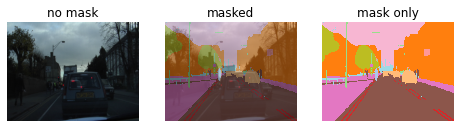

In [81]:
img = open_image(fnames[0])
mask = open_mask(lbl_names[0])
_,axs = plt.subplots(1,3, figsize=(8,4))
img.show(ax=axs[0], title='no mask')
img.show(ax=axs[1], y=mask, title='masked') #seg mask over the img using y arg
mask.show(ax=axs[2], title='mask only', alpha=1.)

[vision.image](https://docs.fast.ai/vision.image.html#ImageSegment)

##4.Why/How img div by 255 and how it results

[fast.ai : vision.image](https://docs.fast.ai/vision.image.html#open_image) - If div=True, pixel values are divided by 255. to become floats between 0. and 1.

- At times, you want to get rid of distortions caused by lights and shadows in an image. 
- Normalizing the RGB values of an image can at times be a simple and effective way of achieving this.

- So sum of the pixel's value over all channels(which is `S`) divides each intensified channel so that nomalized value will be `R/S`, `G/S` and `B/S` (where, S=R+G+B).

- [Detailed explain here](https://aishack.in/tutorials/normalized-rgb/)

# New Section